https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np

# 1.0 Leitura dos dados

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2.0 Pré-processamento

## 2.1 Checagem de valores nulos

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 3.0 Analise de dados

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

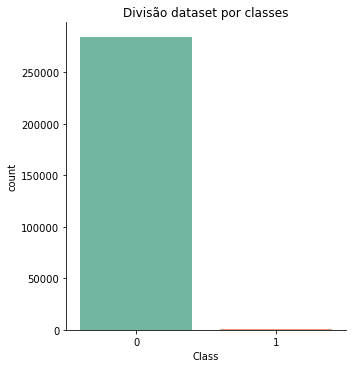

In [7]:
%matplotlib inline
sns.catplot(x="Class", kind="count", palette="Set2", data= df).set(title="Divisão dataset por classes")

In [8]:
#Contando quantos registros de fraudes existem:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Os dados são altamente desbalanceados, a base possui 284315 registros comuns e 492 registros de fraudes. Será necessário aplicar técnicas para o balanceamento.

## 3.1 Histogramas

[Text(0.5, 1.0, 'Histograma de Tempo')]

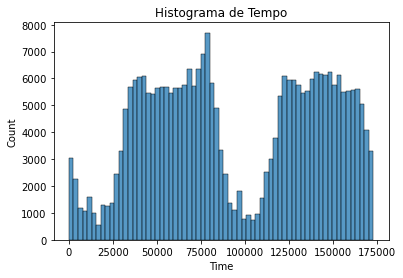

In [9]:
sns.histplot(data = df, x = "Time").set(title="Histograma de Tempo")

### 3.1.1 Histogramas por features

In [10]:
features = df.drop(columns=["Class"]).columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [11]:
numero_plots = len(features)
numero_plots

30

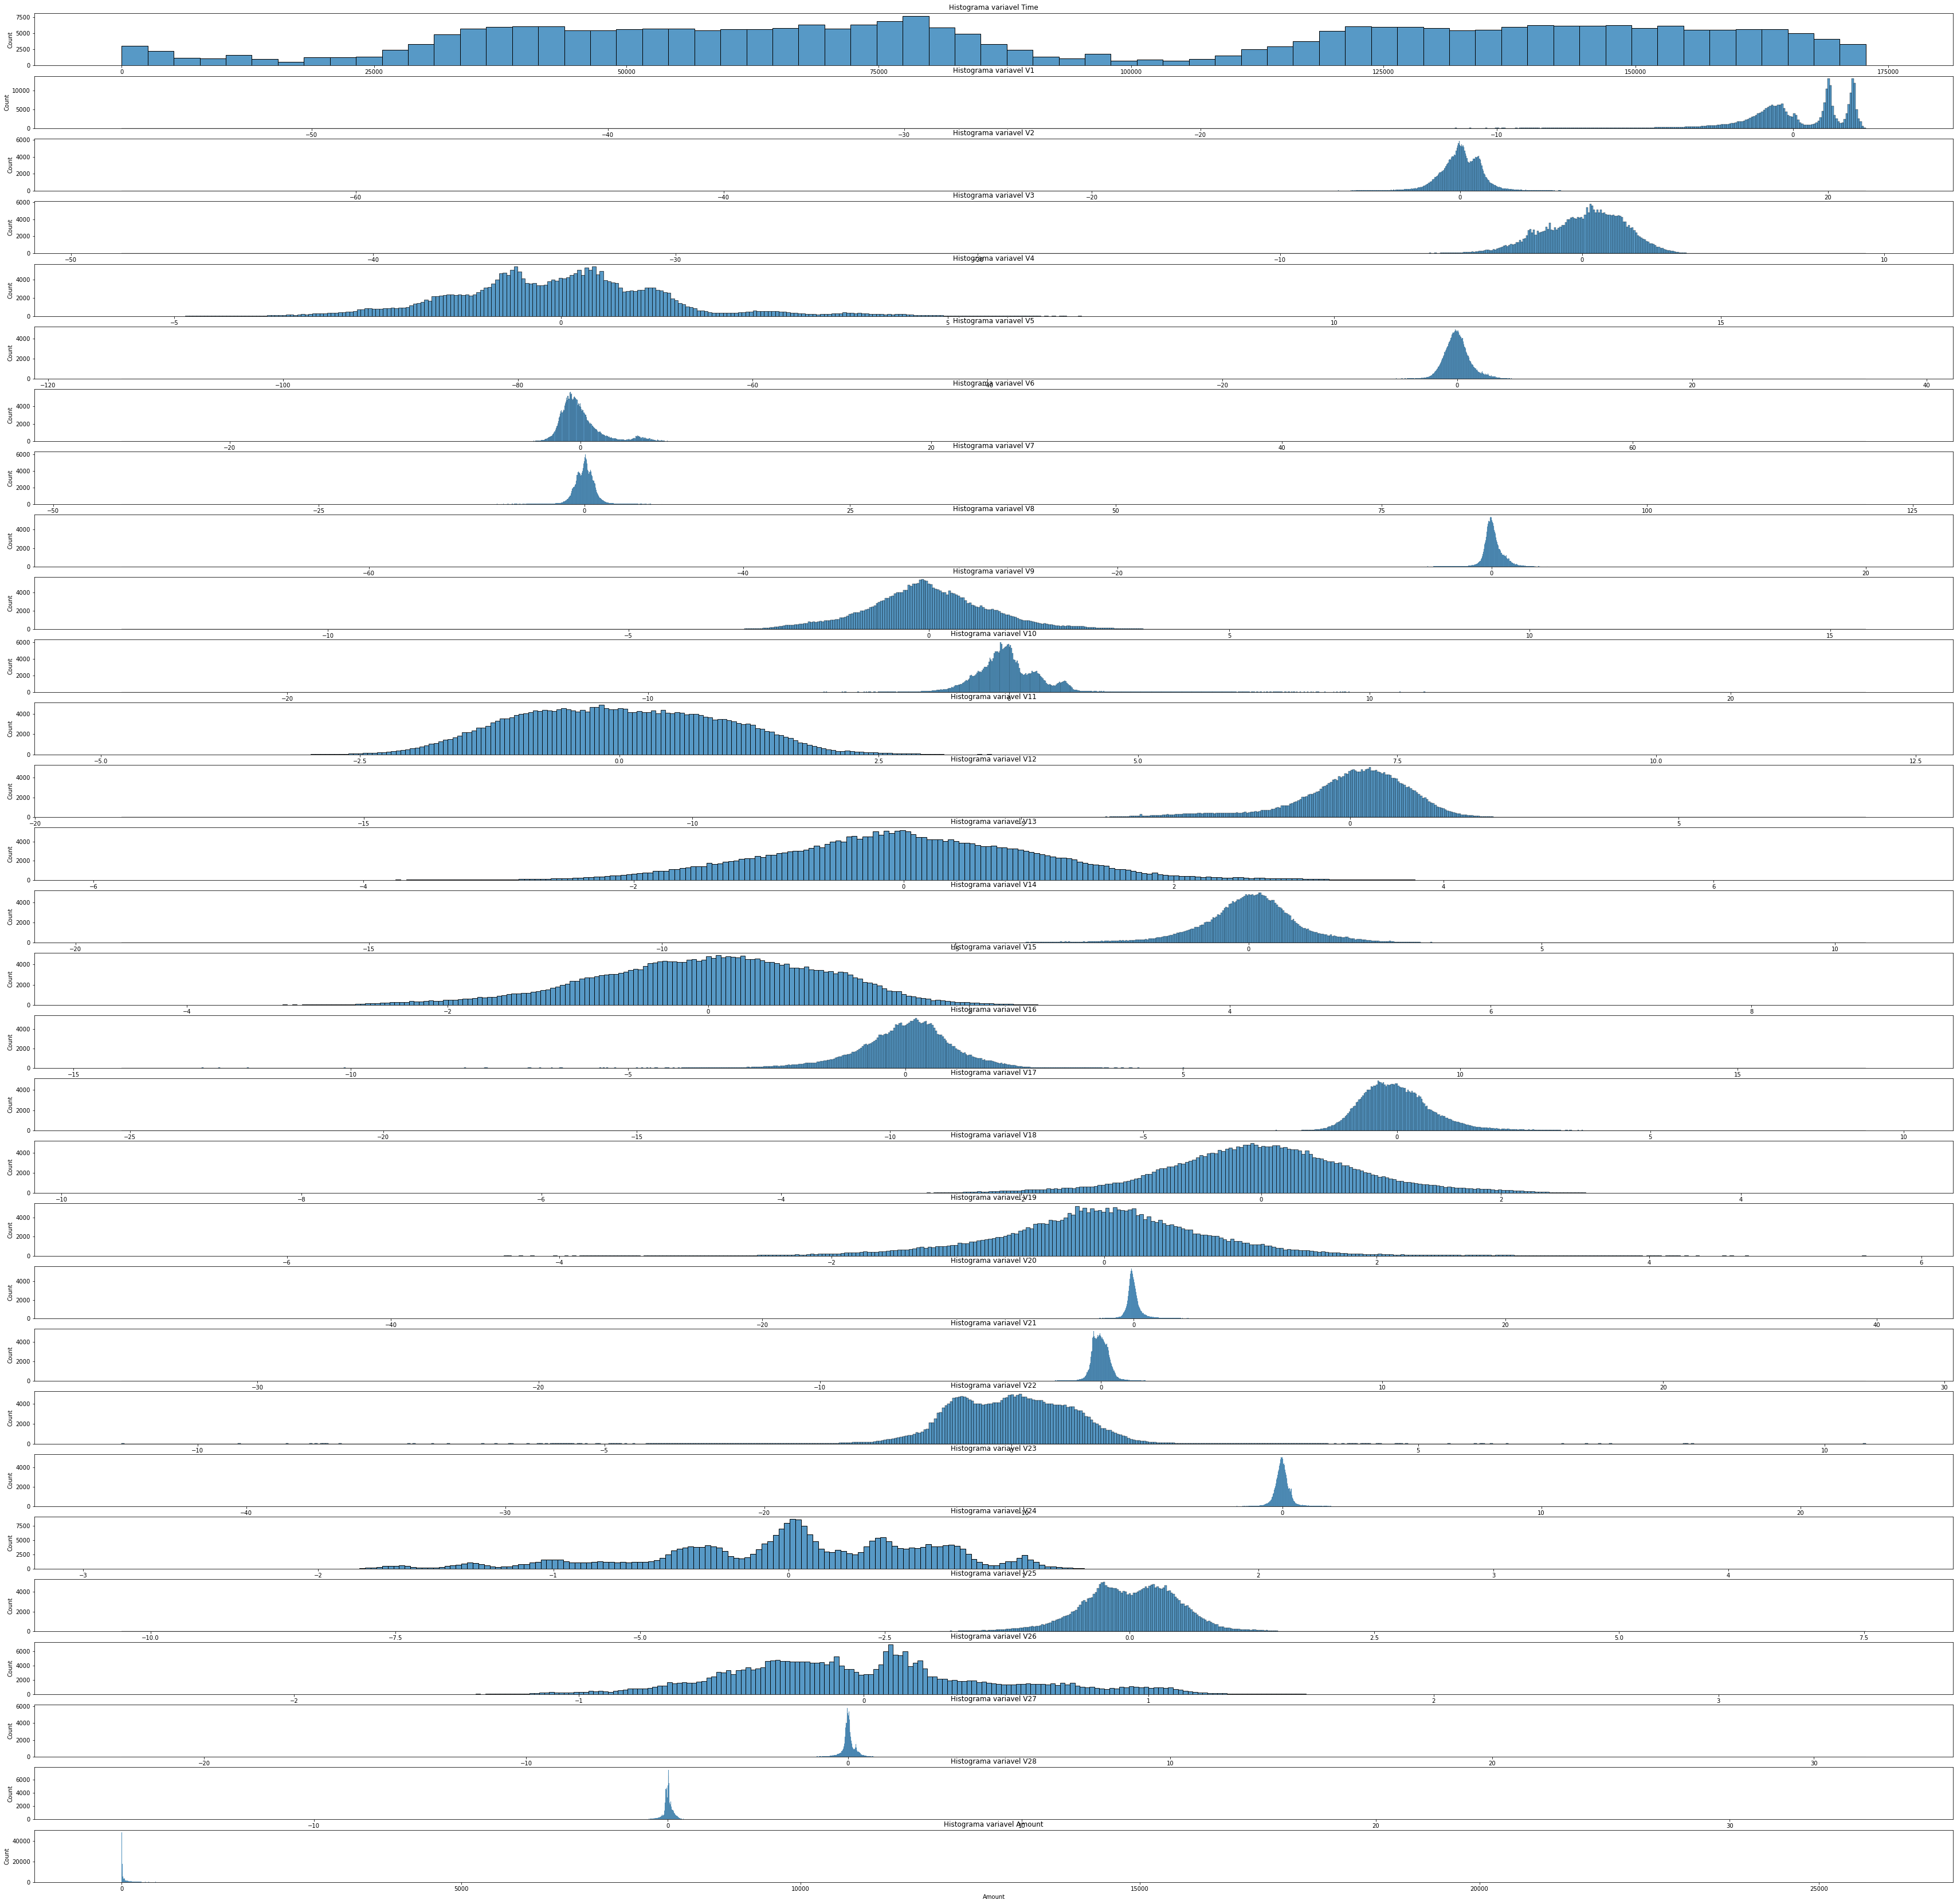

In [47]:
fig, axs = plt.subplots(nrows=numero_plots, figsize = (60,60))

k=0
for i in features:
    sns.histplot(data = df, x = i, ax=axs[k]).set(title="Histograma" + " variavel " + i)
    k = k+1
    


A maioria das distribuições não são normais, além disso a escala varia muito de feature pra feature e isso pode afetar o desempenho de algorítmos que utilizam distância para classificar fraudes de transações normais. A fim de otimizar a performance dos algorítmos de Machine Learning iremos aplicar técnicas para aproximar os dados á uma distribuição normal e iremos padronizá-los com média = 0 e desvio padrão = 1)

# 4 Teste de normalidade

In [12]:
len(df)

284807

Há cerca de 284807 registros, checaremos se é possível aplicar testes de normalidade considerando todos os registros com os

- Testes de Shapiro, Testes de D'Agostinho e Teste de Anderson
- Definimos valor de alfa = 0.05 para ter 95% de nivel de confiança

## 4.1 Shapiro Wilk

In [13]:
from scipy.stats import shapiro

In [14]:
_, p = shapiro(df['V1'])
p

C:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [15]:
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


## 4.2 D'Agostinho

In [16]:
from scipy.stats import normaltest

In [17]:
_, p = normaltest(df['V1'])
p

0.0

In [18]:
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


## 4.3 Anderson

In [19]:
from scipy.stats import anderson

In [20]:
anderson(df['V1']).statistic

7053.7524257128825

In [21]:
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


Os testes de normalidade não performam bem quando há muitos registros, como a base de dados é desbalanceada, optaremos por técnicas de balanceamento. Com os dados balanceados (50% de cada classe) será atingido cerca de 1000 registros. 

Após o balanceamento aplicaremos as técnicas para aproximar os dados para uma distribuição normal seguido da sua padronização para media = 0 e desvio padrão = 1

## 4.4 Testes D'Agostinho com dados aleatórios 1500 registros

In [22]:
from scipy import stats
rng = np.random.default_rng()
pts = 1500
a = rng.normal(0, 1, size=pts)
b = rng.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.65643e-12
The null hypothesis can be rejected


In [23]:
from scipy import stats
rng = np.random.default_rng()
pts = 1500
a = rng.normal(0, 1, size=pts)
b = rng.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = shapiro(x)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 5.39714e-07
The null hypothesis can be rejected


## 4.5 Balanceamento dos dados

In [24]:
from imblearn.under_sampling import NearMiss

In [25]:
X = df.drop(columns=['Class'])
y = df['Class']

In [26]:
nr = NearMiss()
X, y = nr.fit_resample(X, y)

In [27]:
X.shape, y.shape

((984, 30), (984,))

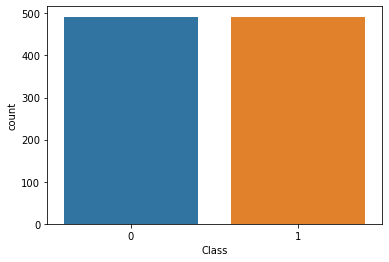

In [28]:
ax = sns.countplot(x=y)

## 4.6 Teste normalidade nos dados balanceados - Shapiro Wilk

In [29]:
features_normal = []
features_nao_normal = []
p_values_shapiro = []
p_values_dagostinho = []

for i in features:
    k2, p = shapiro(X[i])
    _, p2 = normaltest(X[i])
    p_values_shapiro.append(p)
    p_values_dagostinho.append(p2)
    
    alpha = 0.05
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        features_nao_normal.append(i) ## "The null hypothesis can be rejected")
    else:
        features_normal.append(i) ##"The null hypothesis cannot be rejected")

In [30]:
len(features_nao_normal) , len(features_normal)

(29, 1)

In [31]:
df_p_values = pd.DataFrame(p_values_shapiro, columns = ['p_value'])
df_p_values.describe()

,p_value
count,3.000000e+01
mean,2.738417e-03
std,1.499893e-02
min,0.000000e+00
25%,1.332542e-36
50%,3.240918e-31
75%,8.585663e-21
max,8.215252e-02


In [32]:
features_normal

['V13']

A única feature que contem dados distribuidos numa Gaussiana é a V13, aplicaremos 3 técnicas para normalizar as outras 29 features não normais a fim de aproximarmos de uma normal e aumentar a performance dos algorítmos de ML

# 5 INVESTIGAÇÃO APENAS - (NAO APLICAR) - Técnicas para aproximação de distribuições normais

Fonte: https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

## 5.1 Escalando os dados

In [192]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,...,-0.033053,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78
1,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,-0.017278,...,-0.057911,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,2.69
2,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,0.081544,...,0.457988,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,1.29
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,...,-0.098066,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99
4,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,...,-0.044989,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [193]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,90393.878049,-2.382994,2.115600,-3.519994,2.296550,-1.459575,-0.788125,-2.797100,0.295290,-1.296937,...,0.185891,0.309421,-0.008665,-0.026530,-0.030337,0.031152,0.022708,0.087085,0.046227,65.352470
std,47778.797490,5.503503,3.497487,6.216836,3.169148,4.227923,1.667629,5.833749,4.890868,2.327313,...,1.041477,2.801522,1.168185,1.167412,0.560434,0.663162,0.429865,1.020747,0.425555,190.196997
min,406.000000,-30.552380,-8.402154,-31.103685,-4.067605,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-2.085605,0.000000
25%,53709.750000,-2.871640,0.189965,-5.084967,-0.031784,-1.638023,-1.566318,-3.094485,-0.187299,-2.331368,...,-0.198984,-0.225145,-0.583333,-0.216472,-0.379825,-0.305045,-0.270092,-0.054257,-0.053800,1.000000
50%,77183.500000,-0.732607,1.131643,-1.446699,1.314843,-0.241534,-0.733544,-0.628802,0.158687,-0.650814,...,-0.012592,0.101741,-0.010150,-0.028799,0.025828,0.058301,0.027553,0.060864,0.035125,7.645000
75%,143449.250000,1.080413,2.936794,0.372924,4.229802,0.616558,-0.097443,0.276551,0.912601,0.116000,...,0.388452,0.612836,0.546494,0.182499,0.385643,0.416734,0.280840,0.466568,0.226970,23.605000
max,170348.000000,2.313171,22.057729,3.541039,12.114672,11.095089,6.474115,5.802537,20.007208,6.472920,...,11.059004,27.202839,8.361985,5.466230,3.261279,2.208209,2.745261,3.052358,1.779364,2125.870000


há dados negativos, não podemos aplicar logarítmo direto, vamos escalar todas features em um range entre 0 e 1

In [162]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
    
for i in features:
    
    transformados = X[i].to_numpy()
    transformados = transformados.reshape(-1,1)
    
    dados = scaler.fit_transform(transformados)
    X[i] = dados

In [163]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.449918,0.967871,0.289241,0.907005,0.293693,0.656692,0.415649,0.885219,0.668266,0.670849,...,0.269644,0.450359,0.470571,0.783725,0.451506,0.718692,0.319383,0.702343,0.547990,0.000837
1,0.449930,0.967796,0.288166,0.906794,0.294068,0.655471,0.414663,0.884677,0.668641,0.673974,...,0.268007,0.450283,0.468636,0.783921,0.450422,0.716534,0.319626,0.702064,0.547816,0.001265
2,0.449942,0.897648,0.325113,0.922219,0.233876,0.667620,0.453798,0.892260,0.675263,0.678938,...,0.301976,0.449237,0.469986,0.777786,0.366370,0.680806,0.319272,0.757158,0.611748,0.000607
3,0.449918,0.967515,0.289620,0.906823,0.320045,0.659624,0.423540,0.887861,0.667790,0.668427,...,0.265363,0.456662,0.526043,0.774539,0.462426,0.785992,0.210837,0.705910,0.545276,0.001877
4,0.449942,0.967990,0.285845,0.913002,0.289228,0.653423,0.421843,0.884730,0.668226,0.671403,...,0.268858,0.450966,0.475585,0.784014,0.458157,0.718911,0.319404,0.701769,0.544945,0.000842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.992903,0.870957,0.312799,0.767371,0.359461,0.618634,0.341277,0.864558,0.683710,0.571112,...,0.354322,0.471520,0.496714,0.804745,0.327669,0.760980,0.497973,0.732482,0.577902,0.183454
980,0.994110,0.971563,0.318174,0.753345,0.338608,0.679147,0.394377,0.853814,0.676360,0.618209,...,0.286710,0.463360,0.516856,0.772988,0.368097,0.758744,0.485421,0.741833,0.587907,0.000358
981,0.994133,0.909044,0.312822,0.833893,0.280301,0.632066,0.497106,0.837170,0.692111,0.642077,...,0.288148,0.470984,0.563576,0.786603,0.389483,0.578257,0.416575,0.741441,0.589905,0.036639
982,0.997752,0.834873,0.295077,0.741930,0.363651,0.640497,0.268837,0.837711,0.689631,0.592844,...,0.291987,0.467613,0.499612,0.760429,0.348697,0.637132,0.451210,0.789888,0.473977,0.115247


In [164]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.529521,0.857110,0.345299,0.796187,0.393279,0.621855,0.436178,0.825776,0.677126,0.609692,...,0.284060,0.462136,0.514717,0.777806,0.377684,0.688539,0.301539,0.712551,0.551578,0.030742
std,0.281148,0.167455,0.114823,0.179445,0.195841,0.127345,0.129470,0.118188,0.080111,0.116909,...,0.068576,0.056030,0.067725,0.047224,0.105956,0.094875,0.110280,0.098949,0.110106,0.089468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313658,0.842242,0.282080,0.751015,0.249398,0.616480,0.375761,0.819752,0.669222,0.557729,...,0.258718,0.451445,0.481401,0.770122,0.311610,0.640440,0.226422,0.698850,0.525698,0.000470
50%,0.451786,0.907326,0.312995,0.856032,0.332614,0.658542,0.440416,0.869705,0.674889,0.642149,...,0.270991,0.457983,0.514631,0.777714,0.388303,0.692423,0.302782,0.710010,0.548706,0.003596
75%,0.841718,0.962491,0.372258,0.908554,0.512747,0.684388,0.489801,0.888047,0.687238,0.680669,...,0.297398,0.468205,0.546902,0.786262,0.456330,0.743702,0.367762,0.749338,0.598343,0.011104
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Substituiremos simbolicamente os valores = 0 por valores = 0.01

In [166]:
for i in features:
    X[i] = X[i].apply(lambda x: x if x > 0 else 0.01)


In [167]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.529531,0.857120,0.345309,0.796198,0.393290,0.621865,0.436188,0.825787,0.677136,0.609702,...,0.284070,0.462147,0.514778,0.777816,0.377695,0.688549,0.301549,0.712592,0.551588,0.031107
std,0.281129,0.167403,0.114793,0.179401,0.195820,0.127295,0.129437,0.118118,0.080025,0.116857,...,0.068535,0.055947,0.067264,0.047058,0.105920,0.094802,0.110253,0.098658,0.110055,0.089362
min,0.000388,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.005722,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000705,0.010000,0.010000,0.000005
25%,0.313658,0.842242,0.282080,0.751015,0.249398,0.616480,0.375761,0.819752,0.669222,0.557729,...,0.258718,0.451445,0.481401,0.770122,0.311610,0.640440,0.226422,0.698850,0.525698,0.000546
50%,0.451786,0.907326,0.312995,0.856032,0.332614,0.658542,0.440416,0.869705,0.674889,0.642149,...,0.270991,0.457983,0.514631,0.777714,0.388303,0.692423,0.302782,0.710010,0.548706,0.004229
75%,0.841718,0.962491,0.372258,0.908554,0.512747,0.684388,0.489801,0.888047,0.687238,0.680669,...,0.297398,0.468205,0.546902,0.786262,0.456330,0.743702,0.367762,0.749338,0.598343,0.011104
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5.2 Aplicando logarítmo para aproximação de uma normal

In [168]:
for i in features:
    dados = np.log(X[i])
    X[i] = dados


In [169]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,9.840000e+02,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,9.840000e+02,984.000000,...,984.000000,984.000000,9.840000e+02,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-8.612988e-01,-0.196440,-1.111895,-0.285491,-1.058581,-0.518362,-0.882935,-0.210240,-4.080964e-01,-0.524275,...,-1.288390,-0.781970,-6.871356e-01,-0.256658,-1.027218,-0.386466,-1.287395,-0.361986,-0.625798,-5.513024
std,8.100441e-01,0.380020,0.324054,0.449278,0.518591,0.376783,0.361508,0.248036,2.652574e-01,0.303574,...,0.270912,0.182987,3.225798e-01,0.156641,0.373607,0.199330,0.503442,0.311166,0.298269,2.035377
min,-7.853558e+00,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170e+00,-5.163403,...,-4.605170,-4.605170,-4.605170e+00,-4.605170,-4.605170,-4.605170,-7.257183,-4.605170,-4.605170,-12.267107
25%,-1.159451e+00,-0.171688,-1.265565,-0.286329,-1.388707,-0.483730,-0.978801,-0.198754,-4.016400e-01,-0.583883,...,-1.352016,-0.795301,-7.310550e-01,-0.261206,-1.166003,-0.445599,-1.485353,-0.358319,-0.643029,-7.513973
50%,-7.945456e-01,-0.097253,-1.161568,-0.155448,-1.100774,-0.417727,-0.820036,-0.139601,-3.932075e-01,-0.442935,...,-1.305669,-0.780924,-6.643056e-01,-0.251396,-0.945969,-0.367559,-1.194742,-0.342477,-0.600193,-5.465824
75%,-1.723102e-01,-0.038231,-0.988167,-0.095901,-0.667974,-0.379231,-0.713756,-0.118731,-3.750753e-01,-0.384679,...,-1.212684,-0.758850,-6.034860e-01,-0.240466,-0.784539,-0.296115,-1.000319,-0.288565,-0.513592,-4.500513
max,-1.110223e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.110223e-16,0.000000,...,0.000000,0.000000,-1.110223e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 5.4 Novos testes de normalidade

In [181]:
features_normal2 = []
features_nao_normal2 = []
p_values2 = []

for i in features:
    k2, p = shapiro(X[i])
    p_values2.append(p)
    alpha = 0.05
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        features_nao_normal2.append(i) ## "The null hypothesis can be rejected")
    else:
        features_normal2.append(i) ##"The null hypothesis cannot be rejected")

In [182]:
len(features_nao_normal) , len(features_normal), len(features_nao_normal2) , len(features_normal2)

(29, 1, 30, 0)

In [183]:
df_p_values2 = pd.DataFrame(p_values2, columns = ['p_value'])
df_p_values.mean(), df_p_values.std(), df_p_values2.mean(), df_p_values2.std()

(p_value    0.002738
 dtype: float64,
 p_value    0.014999
 dtype: float64,
 p_value    9.100407e-14
 dtype: float64,
 p_value    4.809136e-13
 dtype: float64)

Não se justifica a aplicação de toda a etapa 5, uma vez que os p_values após todo o processamento da etapa 5 foram menores com relação aos p_values anterior ao processamento.

Na prática, quanto menor o p_value maior é a certeza da rejeição da hipotese nula (H0), em resumo maior a certeza que os dados não estão em uma normal.

Dessa forma, utilizaremos os dados sem aplicar o processamento realizado no tópico 5.

# 6.0 Aproximando a distribuição das variaveis Amount e Time para uma normal

In [33]:
df_p_values

,p_value
0,5.550787e-23
1,4.530249e-39
2,1.376172e-33
3,2.204106e-36
4,1.129415e-20
5,3.572185e-37
6,6.146459e-19
7,3.474351e-40
8,1.401298e-45
9,1.441969e-24


Como podemos observar a primeira e ultima feature apresenta um p_value muito baixo, iremos reprocessá-los a fim de aproximar os dados á uma normal.

Faremos isso para as features Time e Ammount uma vez são as que possuem uma escala maior com relação as outras.

In [34]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,90393.878049,-2.382994,2.115600,-3.519994,2.296550,-1.459575,-0.788125,-2.797100,0.295290,-1.296937,...,0.185891,0.309421,-0.008665,-0.026530,-0.030337,0.031152,0.022708,0.087085,0.046227,65.352470
std,47778.797490,5.503503,3.497487,6.216836,3.169148,4.227923,1.667629,5.833749,4.890868,2.327313,...,1.041477,2.801522,1.168185,1.167412,0.560434,0.663162,0.429865,1.020747,0.425555,190.196997
min,406.000000,-30.552380,-8.402154,-31.103685,-4.067605,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-2.085605,0.000000
25%,53709.750000,-2.871640,0.189965,-5.084967,-0.031784,-1.638023,-1.566318,-3.094485,-0.187299,-2.331368,...,-0.198984,-0.225145,-0.583333,-0.216472,-0.379825,-0.305045,-0.270092,-0.054257,-0.053800,1.000000
50%,77183.500000,-0.732607,1.131643,-1.446699,1.314843,-0.241534,-0.733544,-0.628802,0.158687,-0.650814,...,-0.012592,0.101741,-0.010150,-0.028799,0.025828,0.058301,0.027553,0.060864,0.035125,7.645000
75%,143449.250000,1.080413,2.936794,0.372924,4.229802,0.616558,-0.097443,0.276551,0.912601,0.116000,...,0.388452,0.612836,0.546494,0.182499,0.385643,0.416734,0.280840,0.466568,0.226970,23.605000
max,170348.000000,2.313171,22.057729,3.541039,12.114672,11.095089,6.474115,5.802537,20.007208,6.472920,...,11.059004,27.202839,8.361985,5.466230,3.261279,2.208209,2.745261,3.052358,1.779364,2125.870000


In [35]:
X['Amount2'] = np.log(X['Amount']+1)

In [36]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount2
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,90393.878049,-2.382994,2.115600,-3.519994,2.296550,-1.459575,-0.788125,-2.797100,0.295290,-1.296937,...,0.309421,-0.008665,-0.026530,-0.030337,0.031152,0.022708,0.087085,0.046227,65.352470,2.343834
std,47778.797490,5.503503,3.497487,6.216836,3.169148,4.227923,1.667629,5.833749,4.890868,2.327313,...,2.801522,1.168185,1.167412,0.560434,0.663162,0.429865,1.020747,0.425555,190.196997,1.764715
min,406.000000,-30.552380,-8.402154,-31.103685,-4.067605,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-2.085605,0.000000,0.000000
25%,53709.750000,-2.871640,0.189965,-5.084967,-0.031784,-1.638023,-1.566318,-3.094485,-0.187299,-2.331368,...,-0.225145,-0.583333,-0.216472,-0.379825,-0.305045,-0.270092,-0.054257,-0.053800,1.000000,0.693147
50%,77183.500000,-0.732607,1.131643,-1.446699,1.314843,-0.241534,-0.733544,-0.628802,0.158687,-0.650814,...,0.101741,-0.010150,-0.028799,0.025828,0.058301,0.027553,0.060864,0.035125,7.645000,2.156973
75%,143449.250000,1.080413,2.936794,0.372924,4.229802,0.616558,-0.097443,0.276551,0.912601,0.116000,...,0.612836,0.546494,0.182499,0.385643,0.416734,0.280840,0.466568,0.226970,23.605000,3.202917
max,170348.000000,2.313171,22.057729,3.541039,12.114672,11.095089,6.474115,5.802537,20.007208,6.472920,...,27.202839,8.361985,5.466230,3.261279,2.208209,2.745261,3.052358,1.779364,2125.870000,7.662407


## 6.1 Validação normalidade - Amount

In [37]:
k2, p1 = shapiro(X['Amount'])
k2, p2 = shapiro(X['Amount2'])
p1,p2

(0.0, 2.698438828005238e-23)

O valor de P aumentou, no entanto, ainda é maior que alfa, sendo assim embora a distribuição ainda não seja normal houve uma aproximação.

## 6.2 Validação normalidade - Time

In [38]:
X['Time2'] = np.log(X['Time']+1)

In [39]:
k2, p1 = shapiro(X['Time'])
k2, p2 = shapiro(X['Time2'])
p1,p2

(5.550786942973992e-23, 5.8759835782632965e-31)

O valor de P diminuiu, isso significa que os dados se afastaram de uma distribuição normal, dessa forma manteremos a variável time como está atualmente.

## 6.3 Alteração no dataframe

In [40]:
X['Amount'] = X['Amount2']

In [41]:
X = X.drop(columns=['Time2','Amount2'])

In [42]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,...,-0.033053,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.022451
1,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,-0.017278,...,-0.057911,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,1.305626
2,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,0.081544,...,0.457988,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,0.828552
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,...,-0.098066,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,1.607436
4,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,...,-0.044989,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.026042


## 6.4 Alteração no dataframe original

In [43]:
X_producao = df.drop(columns=['Class'])
y_producao = df['Class']

In [44]:
X_producao.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [45]:
X_producao['Amount2'] = np.log(X_producao['Amount']+1)

In [46]:
X_producao['Amount'] = X_producao['Amount2']

In [47]:
X_producao = X_producao.drop(columns=['Amount2'])

In [48]:
X_producao.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


In [49]:
X_producao.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.152188
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.656648
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,1.887070
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,3.135494
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,4.358822
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,10.153941


# 7.0 Modelos de Machine Learning

## 7.1  Arvores de Decisão - Avaliação dados de teste

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [61]:
recall_1 = make_scorer(recall_score)

In [62]:
scoring = {"AUC": "roc_auc", "Recall": recall_1}

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [64]:
resultados = []

for i in range(10):
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        DecisionTreeClassifier(random_state=i),
        param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
    )
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,accuracy_teste,f1_teste,auc_teste]))
    

0
1
2
3
4
5
6
7
8
9


In [65]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['iteracao', 'min_samples_split','max_depth','recall_treino','recall_teste','acuracia_teste','f1_teste','auc_teste'])
resultados.sort_values(by = 'recall_teste', ascending = False)

,iteracao,min_samples_split,max_depth,recall_treino,recall_teste,acuracia_teste,f1_teste,auc_teste
7,7.0,12.0,9.0,0.966114,0.939189,0.945946,0.945578,0.945946
8,8.0,10.0,10.0,0.956727,0.939189,0.945946,0.945578,0.945946
0,0.0,2.0,8.0,0.961254,0.932432,0.942568,0.941980,0.942568
2,2.0,2.0,8.0,0.945993,0.932432,0.929054,0.929293,0.929054
9,9.0,10.0,11.0,0.954243,0.932432,0.942568,0.941980,0.942568
6,6.0,2.0,10.0,0.960452,0.925676,0.925676,0.925676,0.925676
1,1.0,2.0,9.0,0.951823,0.918919,0.935811,0.934708,0.935811
3,3.0,2.0,9.0,0.959488,0.918919,0.922297,0.922034,0.922297
4,4.0,2.0,10.0,0.966303,0.918919,0.935811,0.934708,0.935811
5,5.0,6.0,9.0,0.958700,0.918919,0.935811,0.934708,0.935811


Ao buscar pelos melhores hiperparâmetros encontramos valores de recall da classe 1 superiores a 0,94 nos experimentos 0,7 e 8.

Dentre todos os experimentos que atingiram alto recall para classe 1, os experimentos 0,7 e 8 foram também os que atingiram maiores valores de f1_score e área sobre a curva ROC.

Dessa forma, iremos avaliar se há diferença estatística ao utilizar modelos com os hyperparâmetros:
    
    min_samples_split = 12 e max_depth = 9
    min_samples_split = 10 e max_depth = 10
    min_samples_split = 2 e max_depth = 8

### 7.1.1 Avaliando diferença estatísticas entre os modelos de Decision Tree

In [66]:
recall_1 = make_scorer(recall_score)

In [67]:
scoring = {"AUC": "roc_auc"}

In [68]:
resultados_dt_12_9 = []
resultados_dt_12_9_300 = []

resultados_dt_10_10 = []
resultados_dt_10_10_300 = []

resultados_dt_2_8 = []
resultados_dt_2_8_300 = []


for i in range(30):
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    dt1 = DecisionTreeClassifier(random_state=i, min_samples_split = 12, max_depth = 9)
    dt2 = DecisionTreeClassifier(random_state=i, min_samples_split = 10, max_depth = 10)
    dt3 = DecisionTreeClassifier(random_state=i, min_samples_split = 2, max_depth = 8)
    
    
    # Aplicação dos kfolds para avaliação estatística
    scores1 = cross_val_score(dt1, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores2 = cross_val_score(dt2, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores3 = cross_val_score(dt3, X_train, y_train, cv = kfold, scoring = "roc_auc")
    
    #Armazenando os resultados de cada árvore
    resultados_dt_12_9.append(scores1.mean())
    resultados_dt_12_9_300.append(scores1)
    
    resultados_dt_10_10.append(scores2.mean())
    resultados_dt_10_10_300.append(scores2)
    
    resultados_dt_2_8.append(scores3.mean())
    resultados_dt_2_8_300.append(scores3)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


### 7.1.2 Teste de normalidade Shapiro Wilk: usar testes paramétricos ou não paramétricos?

In [69]:
from scipy.stats import shapiro

In [70]:
_, p = shapiro(resultados_dt_12_9)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [71]:
_, p = shapiro(resultados_dt_12_9_300)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


In [72]:
_, p = shapiro(resultados_dt_10_10)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [73]:
_, p = shapiro(resultados_dt_10_10_300)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


In [74]:
_, p = shapiro(resultados_dt_2_8)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [75]:
_, p = shapiro(resultados_dt_2_8_300)
p
alpha = 0.05
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição não normal


Conforme observado, quando utilizamos a média dos roc_auc sobre os 10 kfolds aproximamos a distribuição á uma Gaussiana. Isso é uma implicação do Teorema Central do Limite. 

Assim sendo, utilizaremos apenas os 30 registros com as médias das ROC_AUC para avaliar a diferença estatística.

### 7.1.3 Anova

Avaliaremos a diferença estatística por meio da ANOVA com:
    
    Alfa = 5%
    Nivel de confiança = 95%
    H0: Não há diferença estatística entre os dados

In [76]:
from scipy.stats import f_oneway

In [77]:
_, p = f_oneway(resultados_dt_12_9, resultados_dt_10_10, resultados_dt_2_8)
p

alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Os dados possuem diferença estatística significante')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Os dados possuem diferença estatística significante


### 7.1.4 Teste de Tukey

Avaliaremos a diferença estatística 2 a 2 com a hipotese nula:

H0: Não há diferença estatística entre os dados

In [78]:
lista_12_9 = ['12_9' for i in range(len(resultados_dt_12_9))]
lista_10_10 = ['10_10' for i in range(len(resultados_dt_10_10))]
lista_2_8 = ['2_8' for i in range(len(resultados_dt_2_8))]

lista_algoritmos = lista_12_9 + lista_10_10 + lista_2_8
len(lista_algoritmos)

90

In [79]:
resultados_algoritmos = {'auc': np.concatenate([resultados_dt_12_9, resultados_dt_10_10, resultados_dt_2_8]),
                         'algoritmo': lista_algoritmos}

In [80]:
import pandas as pd
resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos

,auc,algoritmo
0,0.968792,12_9
1,0.960687,12_9
2,0.954827,12_9
3,0.971719,12_9
4,0.961907,12_9
...,...,...
85,0.963487,2_8
86,0.957741,2_8
87,0.959588,2_8
88,0.953092,2_8


In [81]:
df_avaliacao = resultados_algoritmos.groupby('algoritmo').agg({'auc':np.mean})
df_avaliacao

,auc
algoritmo,
10_10,0.965455
12_9,0.966757
2_8,0.955594


In [82]:
from statsmodels.stats.multicomp import MultiComparison

In [83]:
compara_grupos = MultiComparison(resultados_algoritmos['auc'], resultados_algoritmos['algoritmo'])

In [84]:
teste = compara_grupos.tukeyhsd()
print(teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 10_10   12_9   0.0013 0.5538 -0.0017  0.0043  False
 10_10    2_8  -0.0099  0.001 -0.0129 -0.0069   True
  12_9    2_8  -0.0112  0.001 -0.0142 -0.0082   True
----------------------------------------------------


In [85]:
df_avaliacao

,auc
algoritmo,
10_10,0.965455
12_9,0.966757
2_8,0.955594


Segundo o teste de Tukey há diferença estatística entre os modelos 10_10 e 2_8, e os pares 12_9  e 2_8.

Sendo o modelo 2_8 o pior dentre os 3 avaliados.

Não há diferença estatísticas entre os modelos 10_10 e 12_9, dessa forma manteremos o modelo 12_9

### 7.1.5 Arvore de Decisão - Melhor modelo de testes

In [86]:
arvore_decisao = DecisionTreeClassifier(max_depth=9, min_samples_split=12, random_state=29)
arvore_decisao.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=12, random_state=29)

In [87]:
arvore_decisao

DecisionTreeClassifier(max_depth=9, min_samples_split=12, random_state=29)

In [ ]:
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

### 7.1.6 Previsão do modelo nos dados de produção

In [135]:
y_producao_pred = arvore_decisao.predict(X_producao)

In [136]:
print("Classification Report Dados de Producao:\n",classification_report(y_producao,y_producao_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_producao,y_producao_pred))
print("")

Classification Report Dados de Producao:
               precision    recall  f1-score   support

           0       1.00      0.36      0.53    284315
           1       0.00      0.97      0.01       492

    accuracy                           0.36    284807
   macro avg       0.50      0.67      0.27    284807
weighted avg       1.00      0.36      0.53    284807


Confusion Matrix Dados de Producao:
 [[102085 182230]
 [    14    478]]



In [141]:
recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
recall_prod

0.9715447154471545

In [142]:
accuracy_prod = accuracy_score(y_producao, y_producao_pred)
accuracy_prod

0.36011404214081816

In [143]:
f1_prod = f1_score(y_producao, y_producao_pred)
f1_prod

0.005218340611353711

In [144]:
auc_prod = roc_auc_score(y_producao, y_producao_pred)
auc_prod

0.6653003460463882

Podemos observar que o algorítmo aprendeu a classificar fraudes, no entanto, há uma alta taxa de falsos positivos que pode acarretar num custo de operação altissimo para desbloqueio de cartões para as operadoras, dessa forma, iremos abordar o problema calculando as métricas utilizando todos os dados para validação do modelo

## 7.2 Arvores de Decisão - Avaliação dados de produção

Experimentos variando:
    
    1) Fator de balanceamento de classes na alimentação de dados para o algorítmo
    2) Hiperparâmetros min_samples_split e max_depth;
    
Avaliando:
    
    1) Recall dados treino, Recall dados teste, Recall dados produção
    2) Acurácia dados teste, Acurácia dados produção
    3) F1_Score dados teste, F1_Score dados produção
    3) AUC dados teste, AUC dados produção

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [118]:
recall_1 = make_scorer(recall_score)

In [119]:
scoring = {"AUC": "roc_auc", "Recall": recall_1}

In [127]:
resultados = []
Split = [0.10,0.30,0.50,0.70,0.90] #Proporções testadas

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            DecisionTreeClassifier(random_state=i),
            param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
    

0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.5 0
0.5 1
0.5 2
0.5 3
0.5 4
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4
0.9 0
0.9 1
0.9 2
0.9 3
0.9 4


In [129]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
4,0.1,4.0,2.0,11.0,0.874932,0.851351,0.914634,0.977833,0.915732,0.875000,0.036145,0.920933,0.915184
0,0.1,0.0,2.0,11.0,0.879223,0.851351,0.912602,0.978448,0.917386,0.878049,0.036763,0.921272,0.914998
3,0.1,3.0,2.0,11.0,0.863112,0.851351,0.912602,0.979064,0.916909,0.881119,0.036559,0.921611,0.914759
1,0.1,1.0,3.0,11.0,0.870346,0.851351,0.910569,0.979064,0.917818,0.881119,0.036869,0.921611,0.914200
2,0.1,2.0,7.0,10.0,0.875811,0.851351,0.900407,0.980911,0.919286,0.890459,0.037112,0.922627,0.909862
6,0.3,1.0,2.0,11.0,0.891866,0.878378,0.941057,0.953125,0.867215,0.896552,0.023900,0.926994,0.904072
9,0.3,4.0,2.0,11.0,0.875578,0.878378,0.941057,0.950000,0.865832,0.890411,0.023660,0.924962,0.903379
8,0.3,3.0,9.0,10.0,0.886961,0.878378,0.932927,0.950000,0.866204,0.890411,0.023524,0.924962,0.899508
19,0.7,4.0,3.0,11.0,0.917342,0.898649,0.955285,0.916435,0.834920,0.898649,0.019601,0.913779,0.894998
5,0.3,0.0,11.0,11.0,0.887932,0.858108,0.916667,0.946875,0.868234,0.881944,0.023471,0.915843,0.892408


Podemos observar que nos limites testados de hiperparâmetros os fatores de balanceamento que trouxeram maior AUC variou de 0.1 à 0.3. 

Repetiremos o experimento para variar o fator de balanceamento entre 0 à  0.3

In [148]:
resultados = []
Split = np.linspace(0.05,0.3,5)  #Proporções testadas: 5 possibilidades variando entre 0.05 e 0.3

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            DecisionTreeClassifier(random_state=i),
            param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
    

0.05 0
0.05 1
0.05 2
0.05 3
0.05 4
0.1125 0
0.1125 1
0.1125 2
0.1125 3
0.1125 4
0.175 0
0.175 1
0.175 2
0.175 3
0.175 4
0.2375 0
0.2375 1
0.2375 2
0.2375 3
0.2375 4
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4


In [149]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
5,0.1125,0.0,2.0,10.0,0.862218,0.898649,0.932927,0.986986,0.917246,0.933333,0.037489,0.947800,0.925073
7,0.1125,2.0,3.0,11.0,0.870532,0.885135,0.928862,0.984247,0.917161,0.919298,0.037295,0.940281,0.923001
3,0.0500,3.0,4.0,11.0,0.858538,0.804054,0.902439,0.988387,0.937456,0.868613,0.047484,0.900841,0.919978
8,0.1125,3.0,6.0,10.0,0.863258,0.871622,0.916667,0.984247,0.917909,0.918149,0.037147,0.934286,0.917289
1,0.0500,1.0,8.0,11.0,0.868747,0.797297,0.892276,0.988710,0.937638,0.870849,0.047106,0.897802,0.914997
4,0.0500,4.0,5.0,9.0,0.863616,0.804054,0.888211,0.990000,0.938692,0.884758,0.047668,0.901688,0.913495
2,0.0500,2.0,6.0,9.0,0.873983,0.804054,0.888211,0.989355,0.938046,0.878229,0.047195,0.901350,0.913172
9,0.1125,4.0,2.0,8.0,0.872912,0.885135,0.904472,0.985616,0.919524,0.925795,0.037379,0.941043,0.912011
0,0.0500,0.0,4.0,8.0,0.854473,0.783784,0.882114,0.987742,0.938611,0.859259,0.047297,0.890876,0.910411
6,0.1125,1.0,3.0,8.0,0.862439,0.864865,0.896341,0.984247,0.920037,0.917563,0.037284,0.931289,0.908210


Fatores de balanceamento < 0.175 performaram melhor, refinaremos ainda mais a solução

In [150]:
resultados = []
Split = np.linspace(0.01,0.175,10)  #Proporções testadas: 10 possibilidades variando entre 0.01 e 0.175

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            DecisionTreeClassifier(random_state=i),
            param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
    

0.01 0
0.01 1
0.01 2
0.01 3
0.01 4
0.02833333333333333 0
0.02833333333333333 1
0.02833333333333333 2
0.02833333333333333 3
0.02833333333333333 4
0.04666666666666666 0
0.04666666666666666 1
0.04666666666666666 2
0.04666666666666666 3
0.04666666666666666 4
0.06499999999999999 0
0.06499999999999999 1
0.06499999999999999 2
0.06499999999999999 3
0.06499999999999999 4
0.08333333333333331 0
0.08333333333333331 1
0.08333333333333331 2
0.08333333333333331 3
0.08333333333333331 4
0.10166666666666664 0
0.10166666666666664 1
0.10166666666666664 2
0.10166666666666664 3
0.10166666666666664 4
0.11999999999999998 0
0.11999999999999998 1
0.11999999999999998 2
0.11999999999999998 3
0.11999999999999998 4
0.1383333333333333 0
0.1383333333333333 1
0.1383333333333333 2
0.1383333333333333 3
0.1383333333333333 4
0.15666666666666665 0
0.15666666666666665 1
0.15666666666666665 2
0.15666666666666665 3
0.15666666666666665 4
0.175 0
0.175 1
0.175 2
0.175 3
0.175 4


In [151]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
6,0.028333,1.0,3.0,11.0,0.861410,0.810811,0.904472,0.991973,0.996148,0.848057,0.447911,0.903966,0.950389
9,0.028333,4.0,3.0,10.0,0.832823,0.777027,0.886179,0.992346,0.996928,0.848708,0.499141,0.887746,0.941649
8,0.028333,3.0,2.0,9.0,0.845708,0.777027,0.886179,0.991973,0.996875,0.842491,0.494892,0.887554,0.941623
5,0.028333,0.0,3.0,10.0,0.839113,0.770270,0.884146,0.991786,0.996914,0.838235,0.497427,0.884175,0.940628
7,0.028333,2.0,4.0,11.0,0.837086,0.763514,0.884146,0.991600,0.996710,0.833948,0.481461,0.880797,0.940526
30,0.120000,0.0,3.0,11.0,0.880752,0.864865,0.936992,0.973875,0.933773,0.876712,0.046603,0.925928,0.935379
3,0.010000,3.0,2.0,11.0,0.815197,0.824324,0.882114,0.996981,0.985653,0.844291,0.175212,0.911519,0.933973
31,0.120000,1.0,3.0,9.0,0.878945,0.864865,0.930894,0.977504,0.935827,0.891986,0.047726,0.927961,0.933365
32,0.120000,2.0,4.0,11.0,0.890592,0.851351,0.928862,0.972424,0.932881,0.868966,0.045632,0.919172,0.930875
0,0.010000,0.0,2.0,11.0,0.803414,0.797297,0.873984,0.996780,0.985502,0.830986,0.172379,0.898039,0.929840


Fatores de balanceamento < 0.03 performaram melhor, refinaremos ainda mais a solução

In [152]:
resultados = []
Split = [0.02, 0.025, 0.028333, 0.03]

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            DecisionTreeClassifier(random_state=i),
            param_grid={"min_samples_split": range(2, 13, 1), "max_depth": range(8 ,12, 1)},
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
    

0.02 0
0.02 1
0.02 2
0.02 3
0.02 4
0.025 0
0.025 1
0.025 2
0.025 3
0.025 4
0.028333 0
0.028333 1
0.028333 2
0.028333 3
0.028333 4
0.03 0
0.03 1
0.03 2
0.03 3
0.03 4


In [153]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
11,0.028333,1.0,3.0,11.0,0.861410,0.810811,0.904472,0.991973,0.996148,0.848057,0.447911,0.903966,0.950389
2,0.020000,2.0,2.0,11.0,0.836551,0.837838,0.902439,0.994819,0.997637,0.864111,0.568866,0.917903,0.950120
4,0.020000,4.0,2.0,10.0,0.818338,0.837838,0.888211,0.995351,0.998213,0.876325,0.631960,0.918174,0.943307
14,0.028333,4.0,3.0,10.0,0.832823,0.777027,0.886179,0.992346,0.996928,0.848708,0.499141,0.887746,0.941649
13,0.028333,3.0,2.0,9.0,0.845708,0.777027,0.886179,0.991973,0.996875,0.842491,0.494892,0.887554,0.941623
10,0.028333,0.0,3.0,10.0,0.839113,0.770270,0.884146,0.991786,0.996914,0.838235,0.497427,0.884175,0.940628
12,0.028333,2.0,4.0,11.0,0.837086,0.763514,0.884146,0.991600,0.996710,0.833948,0.481461,0.880797,0.940526
3,0.020000,3.0,3.0,10.0,0.833544,0.831081,0.880081,0.995218,0.998255,0.872340,0.635363,0.914795,0.939270
0,0.020000,0.0,4.0,9.0,0.834530,0.831081,0.878049,0.995749,0.998550,0.884892,0.676586,0.915066,0.938404
1,0.020000,1.0,5.0,10.0,0.815743,0.831081,0.878049,0.995616,0.998420,0.881720,0.657534,0.914999,0.938339


Algorítmos com fator de balanceamento = 0.028333 performaram melhor,
Hyperparâmetros com {min_samples_split, max_depth} = ( (2,9), (3,10), (3,11), (4,11) ) foram os que performaram melhor nesse fator de balanceamento.

Há diferença estatística na AUC sobre os dados de produção utilizando esses hyperparâmetros?

## 7.2.1 Teste de Hipotese 
Há diferença estatística na AUC sobre os dados de produção utilizando esses hyperparâmetros?

In [220]:
resultados_dt_2_9 = []
resultados_dt_3_10 = []
resultados_dt_3_11 = []
resultados_dt_4_11 = []

#Fator de balanceamento
nr = NearMiss(sampling_strategy=0.028333)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

for i in range(30):
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    dt1 = DecisionTreeClassifier(random_state=i, min_samples_split = 2, max_depth = 9)
    dt2 = DecisionTreeClassifier(random_state=i, min_samples_split = 3, max_depth = 10)
    dt3 = DecisionTreeClassifier(random_state=i, min_samples_split = 3, max_depth = 11)
    dt4 = DecisionTreeClassifier(random_state=i, min_samples_split = 4, max_depth = 11)  
    
    
    # Aplicação dos kfolds para avaliação estatística
    scores1 = cross_val_score(dt1, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores2 = cross_val_score(dt2, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores3 = cross_val_score(dt3, X_train, y_train, cv = kfold, scoring = "roc_auc")
    scores4 = cross_val_score(dt4, X_train, y_train, cv = kfold, scoring = "roc_auc") 
    
    #Armazenando os resultados de cada árvore
    resultados_dt_2_9.append(scores1.mean())
    resultados_dt_3_10.append(scores2.mean())
    resultados_dt_3_11.append(scores3.mean())
    resultados_dt_4_11.append(scores4.mean())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


### Teste de Normalidade
Alfa = 1%, Confiança = 99%  
H0: A distribuição é normal

In [221]:
from scipy.stats import shapiro

In [222]:
_, p = shapiro(resultados_dt_2_9)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [223]:
_, p = shapiro(resultados_dt_3_10)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [224]:
_, p = shapiro(resultados_dt_3_11)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


In [225]:
_, p = shapiro(resultados_dt_4_11)
p
alpha = 0.01
if p > alpha:
  print('Distribuição normal')
else:
  print('Distribuição não normal')

Distribuição normal


### ANOVA

In [226]:
from scipy.stats import f_oneway

In [227]:
_, p = f_oneway(resultados_dt_2_9, resultados_dt_3_10, resultados_dt_3_11,resultados_dt_4_11)
p

7.519441197171596e-05

In [228]:
alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada. Os dados possuem diferença estatística significante')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Os dados possuem diferença estatística significante


### Teste Tukey

In [229]:
lista_2_9 = ['2_9' for i in range(len(resultados_dt_2_9))]
lista_3_10 = ['3_10' for i in range(len(resultados_dt_3_10))]
lista_3_11 = ['3_11' for i in range(len(resultados_dt_3_11))]
lista_4_11 = ['4_11' for i in range(len(resultados_dt_4_11))]

lista_algoritmos = lista_2_9 + lista_3_10 + lista_3_11 + lista_4_11
len(lista_algoritmos)

120

In [230]:
resultados_algoritmos = {'auc': np.concatenate([resultados_dt_2_9, resultados_dt_3_10, resultados_dt_3_11, resultados_dt_4_11]),
                         'algoritmo': lista_algoritmos}

In [231]:
resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos

,auc,algoritmo
0,0.894562,2_9
1,0.904114,2_9
2,0.892983,2_9
3,0.906294,2_9
4,0.903421,2_9
...,...,...
115,0.902958,4_11
116,0.923369,4_11
117,0.908690,4_11
118,0.894875,4_11


In [232]:
df_avaliacao = resultados_algoritmos.groupby('algoritmo').agg({'auc':np.mean})
df_avaliacao

,auc
algoritmo,
2_9,0.898304
3_10,0.903861
3_11,0.907638
4_11,0.910567


In [233]:
from statsmodels.stats.multicomp import MultiComparison

In [234]:
compara_grupos = MultiComparison(resultados_algoritmos['auc'], resultados_algoritmos['algoritmo'])

In [235]:
teste = compara_grupos.tukeyhsd()
print(teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   2_9   3_10   0.0056 0.1629 -0.0014 0.0125  False
   2_9   3_11   0.0093 0.0035  0.0024 0.0163   True
   2_9   4_11   0.0123  0.001  0.0053 0.0192   True
  3_10   3_11   0.0038 0.4899 -0.0032 0.0107  False
  3_10   4_11   0.0067  0.062 -0.0002 0.0136  False
  3_11   4_11   0.0029 0.6685  -0.004 0.0099  False
---------------------------------------------------


In [236]:
resultados_dt_2_9 = np.array(resultados_dt_2_9)
resultados_dt_3_10 = np.array(resultados_dt_3_10)
resultados_dt_3_11 = np.array(resultados_dt_3_11)
resultados_dt_4_11 = np.array(resultados_dt_4_11)

In [237]:
resultados_dt_2_9.mean(), resultados_dt_3_10.mean(), resultados_dt_3_11.mean(), resultados_dt_4_11.mean()

(0.8983038746758255,
 0.9038612213678245,
 0.9076381883454795,
 0.9105666392795401)

In [238]:

stats.variation(resultados_dt_2_9) * 100, stats.variation(resultados_dt_3_10) * 100, stats.variation(resultados_dt_3_11) * 100, stats.variation(resultados_dt_4_11) * 100

(1.1386590610782887,
 1.0956696433709174,
 1.0807484373456533,
 1.1595406614384274)

O par de hiperparâmetros que apresentou os piores resultados de AUC 2_9 foi o único que obteve diferença estatistica entre 2 outros pares 3_11 e 4_11 e não possui diferença com relação ao par 3_10.

Os pares de hiperparâmetros 3_11 e 4_11 não possuem diferença estatistica significativa. Podemos escolher qualquer um dos dois pares de hiperparâmetros, escolheremos dessa forma, os pares 4_11 que apresentou maior valor de AUC.

### 7.2.3 Modelo Final Arvore de Decisão

In [255]:
#Fator de balanceamento
nr = NearMiss(sampling_strategy=0.028333)
X, y = nr.fit_resample(X_producao, y_producao)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

arvore_decisao = DecisionTreeClassifier(max_depth=4, min_samples_split=11, random_state=15)
arvore_decisao.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=11, random_state=15)

In [256]:
y_producao_pred = arvore_decisao.predict(X_producao)

In [257]:
print("Classification Report Dados de Producao:\n",classification_report(y_producao,y_producao_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_producao,y_producao_pred))
print("")

Classification Report Dados de Producao:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.73      0.84      0.78       492

    accuracy                           1.00    284807
   macro avg       0.87      0.92      0.89    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix Dados de Producao:
 [[284163    152]
 [    77    415]]



In [262]:
#Calculando o recall da classe 1 e armazenando para testes estatísticos
recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
recall_prod

0.8434959349593496

In [263]:
#Calculando acurácia 
accuracy_prod = accuracy_score(y_producao, y_producao_pred)
accuracy_prod

0.9991959467288374

In [264]:
#calculando f1_score
f1_prod = f1_score(y_producao, y_producao_pred)
f1_prod

0.7837582625118037

In [265]:
    
#calculando área sobre a curva ROC_AUC:
auc_prod = roc_auc_score(y_producao, y_producao_pred)
auc_prod

0.9214806583331295

Recall_1 = 84%  
Acurácia 99.91%  
f1_score = 0.7837  
AUC = 0.9214  

# 7.3 Random Forest - Avaliando dados de produção

Experimentos variando:

1) Fator de balanceamento de classes na alimentação de dados para o algorítmo  
2) Hiperparâmetros min_samples_split e max_depth;  

Avaliando:

1) Recall dados treino, Recall dados teste, Recall dados produção  
2) Acurácia dados teste, Acurácia dados produção  
3) F1_Score dados teste, F1_Score dados produção  
3) AUC dados teste, AUC dados produção  

### 7.3.1 Escolha do fator de balanceamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [266]:
n_components = [2,3,4]
max_depth = [9,10,11]
min_samples_split = [2]
min_samples_leaf = [1]
criterion = ['gini','entropy']

In [267]:
recall_1 = make_scorer(recall_score)

In [268]:
scoring = {"AUC": "roc_auc", "Recall": recall_1}

In [277]:
resultados = []
Split = [0.10,0.30,0.50,0.70,0.90] #Proporções testadas

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            RandomForestClassifier(random_state=i),
            param_grid={"max_depth": range(9,11,2), "min_samples_split": range(2,3,1),
                  "min_samples_leaf": range(1,3,2), "criterion": ['gini','entropy']   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
    
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))

0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.5 0
0.5 1
0.5 2
0.5 3
0.5 4
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4
0.9 0
0.9 1
0.9 2
0.9 3
0.9 4


In [278]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
10,0.5,0,2,9,1,entropy,0.8694708864600076,0.9054054054054054,0.9613821138211383,0.963882618510158,0.9909763453847693,0.943661971830986,0.2690557451649602,0.9493128721942281,0.9762048356419059
13,0.5,3,2,9,1,entropy,0.8708822988634249,0.8918918918918919,0.9573170731707317,0.9548532731376975,0.990614696970229,0.9295774647887325,0.2605809128630705,0.9391662849289968,0.9739946954232745
11,0.5,1,2,9,1,entropy,0.876901255260638,0.8986486486486487,0.9552845528455285,0.9571106094808126,0.9910641241261626,0.9333333333333333,0.2697274031563845,0.9425446633073752,0.9732052963126752
20,0.9,0,2,9,1,entropy,0.9012996536635376,0.8986486486486487,0.967479674796748,0.9423076923076923,0.9751375492877633,0.9366197183098591,0.11851114154114278,0.9401779828609097,0.9713152379224407
21,0.9,1,2,9,1,entropy,0.9023534605229651,0.9054054054054054,0.9654471544715447,0.9455128205128205,0.9724725866990629,0.9403508771929824,0.10807736063708759,0.943556361239288,0.9689659492527253
8,0.3,3,2,9,1,entropy,0.8692326122812117,0.8445945945945946,0.9369918699186992,0.9609375,0.9971770356767916,0.9090909090909091,0.5341830822711472,0.9202647769720941,0.9671365272601429
9,0.3,4,2,9,1,entropy,0.8676867679774913,0.8378378378378378,0.9349593495934959,0.9609375,0.9973806823568241,0.9084249084249085,0.5522208883553421,0.9179026587563172,0.966224025253108
7,0.3,2,2,9,1,entropy,0.8690509019819365,0.8513513513513513,0.9349593495934959,0.9625,0.9969839224457264,0.9130434782608695,0.5171444631815627,0.9236431553504725,0.9660253020060052
6,0.3,1,2,9,1,entropy,0.8692927571626449,0.8513513513513513,0.9329268292682927,0.9625,0.9976440185810039,0.9130434782608695,0.5777218376337319,0.9236431553504725,0.9653414196637792
12,0.5,2,2,9,1,gini,0.8733067233400937,0.9054054054054054,0.943089430894309,0.963882618510158,0.9873177274434968,0.943661971830986,0.20440528634361235,0.9493128721942281,0.9652418471496675


Os melhores resultados foram obtidos com fator de balanceamento entre 0.3 e 0.7

In [294]:
resultados = []
Split = np.linspace(0.3,0.7,10)  #Proporções testadas: 10 possibilidades variando entre 0.3 e 0.7
auc = []
media_auc = []

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            RandomForestClassifier(random_state=i),
            param_grid={"max_depth": range(9,11,2), "min_samples_split": range(2,3,1),
                  "min_samples_leaf": range(1,3,2), "criterion": ['gini','entropy']   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
        auc.append(auc_prod)
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
        
    media_auc.append(np.array(auc).mean())
    auc = []

0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.34444444444444444 0
0.34444444444444444 1
0.34444444444444444 2
0.34444444444444444 3
0.34444444444444444 4
0.38888888888888884 0
0.38888888888888884 1
0.38888888888888884 2
0.38888888888888884 3
0.38888888888888884 4
0.4333333333333333 0
0.4333333333333333 1
0.4333333333333333 2
0.4333333333333333 3
0.4333333333333333 4
0.47777777777777775 0
0.47777777777777775 1
0.47777777777777775 2
0.47777777777777775 3
0.47777777777777775 4
0.5222222222222221 0
0.5222222222222221 1
0.5222222222222221 2
0.5222222222222221 3
0.5222222222222221 4
0.5666666666666667 0
0.5666666666666667 1
0.5666666666666667 2
0.5666666666666667 3
0.5666666666666667 4
0.611111111111111 0
0.611111111111111 1
0.611111111111111 2
0.611111111111111 3
0.611111111111111 4
0.6555555555555554 0
0.6555555555555554 1
0.6555555555555554 2
0.6555555555555554 3
0.6555555555555554 4
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4


In [295]:
#transformando os resultados para dataframe:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
17,0.4333333333333333,2,2,9,1,entropy,0.8589402203903612,0.9121621621621622,0.9613821138211383,0.9693251533742331,0.9932480592120277,0.9473684210526316,0.3297316138027187,0.953148529761433,0.9773426581275292
18,0.4333333333333333,3,2,9,1,entropy,0.8604851390702908,0.918918918918919,0.9613821138211383,0.967280163599182,0.9930689905795854,0.9444444444444445,0.32397260273972606,0.9535943568201632,0.977252968874412
29,0.5222222222222221,4,2,9,1,entropy,0.8696341580165111,0.9121621621621622,0.9613821138211383,0.962877030162413,0.9906462973171305,0.9440559440559442,0.26204986149584486,0.9507807277241908,0.9760395260381214
30,0.5666666666666667,0,2,9,1,entropy,0.8797379512403107,0.9054054054054054,0.9613821138211383,0.9607843137254902,0.9879708012794629,0.943661971830986,0.2163769441903019,0.9488565488565488,0.9746994630797828
32,0.5666666666666667,2,2,9,1,entropy,0.8738020420265757,0.9054054054054054,0.9613821138211383,0.9607843137254902,0.9872229264027921,0.943661971830986,0.20632497273718645,0.9488565488565488,0.9743248785520583
25,0.5222222222222221,0,2,9,1,entropy,0.864911293208707,0.8986486486486487,0.9552845528455285,0.9605568445475638,0.9922579150091114,0.9399293286219081,0.2988871224165342,0.9457907554197307,0.9738032246667894
40,0.6555555555555554,0,2,9,1,entropy,0.9059799449904314,0.8581081081081081,0.9573170731707317,0.9410187667560321,0.9877495988511519,0.9202898550724637,0.21259309410968177,0.9268318318318318,0.9725596673734002
38,0.611111111111111,3,2,9,1,entropy,0.8886796028572345,0.8918918918918919,0.959349593495935,0.9538461538461539,0.985298816391451,0.9361702127659575,0.18397973104657964,0.9418137145409873,0.9723466571844552
26,0.5222222222222221,1,2,9,1,gini,0.8621832876993947,0.918918918918919,0.9512195121951219,0.9651972157772621,0.9894805956314277,0.9477351916376306,0.2380467955239064,0.954159106102569,0.9703831588374798
34,0.5666666666666667,4,2,9,1,entropy,0.865960532015948,0.8918918918918919,0.9532520325203252,0.9558823529411765,0.9862398044991871,0.9361702127659575,0.1931233271566811,0.9420997920997921,0.9697744607671356


In [298]:
data = {'split': Split, 'Media AUC': media_auc}
pd.DataFrame.from_dict(data).sort_values(by = 'Media AUC', ascending = False)

,split,Media AUC
3,0.433333,0.971139
5,0.522222,0.971087
6,0.566667,0.967885
8,0.655556,0.965012
4,0.477778,0.963965
0,0.300000,0.963133
7,0.611111,0.962583
2,0.388889,0.960999
9,0.700000,0.960287
1,0.344444,0.954303


O melhor fator de balanceamento está entre 0.43 e 0.57

In [299]:
resultados = []
Split = np.linspace(0.43,0.57,10)  #Proporções testadas: 10 possibilidades variando entre 0.43 e 0.57
auc = []
media_auc = []

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            RandomForestClassifier(random_state=i),
            param_grid={"max_depth": range(9,11,2), "min_samples_split": range(2,3,1),
                  "min_samples_leaf": range(1,3,2), "criterion": ['gini','entropy']   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
        auc.append(auc_prod)
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
        
    media_auc.append(np.array(auc).mean())
    auc = []

0.43 0
0.43 1
0.43 2
0.43 3
0.43 4
0.44555555555555554 0
0.44555555555555554 1
0.44555555555555554 2
0.44555555555555554 3
0.44555555555555554 4
0.4611111111111111 0
0.4611111111111111 1
0.4611111111111111 2
0.4611111111111111 3
0.4611111111111111 4
0.4766666666666666 0
0.4766666666666666 1
0.4766666666666666 2
0.4766666666666666 3
0.4766666666666666 4
0.4922222222222222 0
0.4922222222222222 1
0.4922222222222222 2
0.4922222222222222 3
0.4922222222222222 4
0.5077777777777778 0
0.5077777777777778 1
0.5077777777777778 2
0.5077777777777778 3
0.5077777777777778 4
0.5233333333333333 0
0.5233333333333333 1
0.5233333333333333 2
0.5233333333333333 3
0.5233333333333333 4
0.5388888888888889 0
0.5388888888888889 1
0.5388888888888889 2
0.5388888888888889 3
0.5388888888888889 4
0.5544444444444444 0
0.5544444444444444 1
0.5544444444444444 2
0.5544444444444444 3
0.5544444444444444 4
0.57 0
0.57 1
0.57 2
0.57 3
0.57 4


In [300]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
7,0.44555555555555554,2,2,9,1,entropy,0.8642021944005256,0.918918918918919,0.9634146341463414,0.9707724425887265,0.9938273989052235,0.951048951048951,0.35033259423503327,0.9564383114232057,0.9786473307903506
41,0.5544444444444444,1,2,9,1,entropy,0.8674097599628159,0.9256756756756757,0.9695121951219512,0.9685990338164251,0.9860221132205318,0.9547038327526132,0.19331306990881458,0.9590784393415972,0.9777814391715133
1,0.43,1,2,9,1,entropy,0.8504304614745111,0.9054054054054054,0.9613821138211383,0.9653767820773931,0.9919489338394071,0.9403508771929824,0.2920654523000926,0.9483295248601371,0.9766919713892284
4,0.43,4,2,9,1,entropy,0.8606533899940667,0.9054054054054054,0.959349593495935,0.9633401221995926,0.9928864107974874,0.937062937062937,0.3178451178451178,0.9468717989126152,0.9761470194586933
17,0.4766666666666666,2,2,9,1,entropy,0.8630737366391514,0.9054054054054054,0.9613821138211383,0.9585152838427947,0.9904461617867538,0.9337979094076654,0.257976547586583,0.9446381865736704,0.9759392851081669
30,0.5233333333333333,0,2,9,1,entropy,0.8677911657456635,0.9121621621621622,0.959349593495935,0.9627906976744186,0.9912115924117033,0.9440559440559442,0.2738613286916159,0.950761932144911,0.9753081611501271
45,0.57,0,2,9,1,entropy,0.8780832715771044,0.8986486486486487,0.9613821138211383,0.9582309582309583,0.9890838357203299,0.9399293286219081,0.23329223181257705,0.9454633204633205,0.9752569433393541
40,0.5544444444444444,0,2,9,1,entropy,0.8660786785196564,0.9256756756756757,0.9634146341463414,0.9710144927536232,0.9869947016751695,0.958041958041958,0.20378331900257954,0.9609581385897175,0.9752250702694495
32,0.5233333333333333,2,2,9,1,entropy,0.8714811674477364,0.9121621621621622,0.9613821138211383,0.9674418604651163,0.9887256984554452,0.9507042253521126,0.2275679576617753,0.9543080314356912,0.9750775648331198
5,0.44555555555555554,0,2,9,1,entropy,0.8620541385500818,0.9054054054054054,0.9552845528455285,0.9665970772442589,0.9943365156053047,0.943661971830986,0.3681942812377595,0.9496815546664489,0.9748443234480707


In [301]:
data = {'split': Split, 'Media AUC': media_auc}
pd.DataFrame.from_dict(data).sort_values(by = 'Media AUC', ascending = False)

,split,Media AUC
1,0.445556,0.972355
8,0.554444,0.972027
6,0.523333,0.971584
0,0.430000,0.969912
4,0.492222,0.969854
7,0.538889,0.969721
9,0.570000,0.966320
3,0.476667,0.966134
2,0.461111,0.965562
5,0.507778,0.963596


O melhor fator de balanceamento está entre 0.523 e 0.554

In [303]:
resultados = []
Split = np.linspace(0.523,0.554,10)  #Proporções testadas: 10 possibilidades variando entre 0.523 e 0.554
auc = []
media_auc = []

for k in Split:   #Loop para definir a proporção dos exemplos que o algorítmo será alimentado:
    
    ## Balanceamento dos dados:
    nr = NearMiss(sampling_strategy=k)
    X, y = nr.fit_resample(X_producao, y_producao)
    
    #Split dos dados:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    for i in range(5):         #Loop para definir a qtde de repetições no experimento
        print(k,i)
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
        gs = GridSearchCV(
            RandomForestClassifier(random_state=i),
            param_grid={"max_depth": range(9,11,2), "min_samples_split": range(2,3,1),
                  "min_samples_leaf": range(1,3,2), "criterion": ['entropy']   },
            scoring=scoring,
            refit="Recall",
            n_jobs=2,
            return_train_score=True,
            cv = kfold
        )
        #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
        gs.fit(X_train, y_train)
    
        #Melhores resultados e hiperparâmetros encontrados
        recall_treino = gs.best_score_
        hyperparams = gs.best_params_
    
        ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
        y_test_pred = gs.predict(X_test)
    
        ## Predizendo as classes em todo os dados de produção
        y_producao_pred = gs.predict(X_producao)
    
        #Calculando o recall da classe 1 e armazenando para testes estatísticos
        recall_value = recall_score(y_test, y_test_pred, pos_label=1)
        recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
        #Calculando acurácia 
        accuracy_teste = accuracy_score(y_test, y_test_pred)
        accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
        #calculando f1_score
        f1_teste = f1_score(y_test, y_test_pred)
        f1_prod = f1_score(y_producao, y_producao_pred)
    
        #calculando área sobre a curva ROC_AUC:
        auc_teste = roc_auc_score(y_test, y_test_pred)
        auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
        auc.append(auc_prod)
        # Adicionando todos resultados em uma única lista
        resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))
        
    media_auc.append(np.array(auc).mean())
    auc = []

0.523 0
0.523 1
0.523 2
0.523 3
0.523 4
0.5264444444444445 0
0.5264444444444445 1
0.5264444444444445 2
0.5264444444444445 3
0.5264444444444445 4
0.529888888888889 0
0.529888888888889 1
0.529888888888889 2
0.529888888888889 3
0.529888888888889 4
0.5333333333333333 0
0.5333333333333333 1
0.5333333333333333 2
0.5333333333333333 3
0.5333333333333333 4
0.5367777777777778 0
0.5367777777777778 1
0.5367777777777778 2
0.5367777777777778 3
0.5367777777777778 4
0.5402222222222223 0
0.5402222222222223 1
0.5402222222222223 2
0.5402222222222223 3
0.5402222222222223 4
0.5436666666666667 0
0.5436666666666667 1
0.5436666666666667 2
0.5436666666666667 3
0.5436666666666667 4
0.5471111111111111 0
0.5471111111111111 1
0.5471111111111111 2
0.5471111111111111 3
0.5471111111111111 4
0.5505555555555556 0
0.5505555555555556 1
0.5505555555555556 2
0.5505555555555556 3
0.5505555555555556 4
0.554 0
0.554 1
0.554 2
0.554 3
0.554 4


In [304]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
28,0.5402222222222223,3,2,9,1,entropy,0.8720675214082922,0.9054054054054054,0.9695121951219512,0.9619952494061758,0.9893752611417557,0.943661971830986,0.2396984924623116,0.949039699039699,0.9794609144014518
29,0.5402222222222223,4,2,9,1,entropy,0.8626162127363397,0.918918918918919,0.9695121951219512,0.9667458432304038,0.9892102371079362,0.951048951048951,0.2369009187981128,0.9557964557964558,0.9793782595995595
23,0.5367777777777778,3,2,9,1,entropy,0.869972787086285,0.9121621621621622,0.9695121951219512,0.9621749408983451,0.9886589866119864,0.9440559440559442,0.22801147227533464,0.9506265356265358,0.9791021573889832
41,0.5505555555555556,1,2,9,1,entropy,0.8778638415066682,0.8986486486486487,0.967479674796748,0.9615384615384616,0.9897333984066403,0.9432624113475179,0.24561403508771937,0.9474586526825334,0.9786257913578907
47,0.554,2,2,9,1,entropy,0.8626891762452107,0.918918918918919,0.967479674796748,0.9685990338164251,0.9891013914686085,0.9543859649122808,0.2347140039447732,0.9575797602113391,0.9783092410527714
42,0.5505555555555556,2,2,9,1,entropy,0.8691888351959964,0.8986486486486487,0.9654471544715447,0.9615384615384616,0.989894911290804,0.9432624113475179,0.248171368861024,0.9474586526825334,0.9776921859971814
48,0.554,3,2,9,1,entropy,0.8588407855045981,0.9256756756756757,0.9654471544715447,0.9685990338164251,0.9888942336389204,0.9547038327526132,0.2309749574519815,0.9590784393415972,0.9771909813474091
8,0.5264444444444445,3,2,9,1,entropy,0.864148577785987,0.9121621621621622,0.9634146341463414,0.9649532710280374,0.9903759387936392,0.9473684210526316,0.25698021143941446,0.9525096525096526,0.9769186144018378
45,0.554,0,2,9,1,entropy,0.8583123179921092,0.9256756756756757,0.9654471544715447,0.9685990338164251,0.9875529744704309,0.9547038327526132,0.21134593993325917,0.9590784393415972,0.9765191912554336
20,0.5367777777777778,0,2,9,1,entropy,0.8682047236641157,0.9121621621621622,0.9634146341463414,0.9645390070921985,0.9894454841348703,0.9473684210526316,0.2397572078907436,0.9524447174447175,0.97645258200819


In [305]:
data = {'split': Split, 'Media AUC': media_auc}
pd.DataFrame.from_dict(data).sort_values(by = 'Media AUC', ascending = False)

,split,Media AUC
5,0.540222,0.977263
9,0.554000,0.976573
4,0.536778,0.976382
1,0.526444,0.975564
8,0.550556,0.975177
0,0.523000,0.974527
6,0.543667,0.974037
7,0.547111,0.973911
2,0.529889,0.972257
3,0.533333,0.972184


O fator de balanceamento que trouxe maior AUC foi 0.540222, partiremos para os experimentos para encontrar os melhores hiperparâmetros

### 7.3 Escolha dos hiperparâmetros

In [307]:
resultados = []

 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.540222)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(3):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i),
        param_grid={"max_depth": range(2,10,2), "min_samples_split": range(2,10,2),
                "min_samples_leaf": range(1,10,2), "criterion": ['entropy','gini']   },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
        )
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    auc.append(auc_prod)
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([k,i,hyperparams['min_samples_split'],hyperparams['max_depth'],hyperparams['min_samples_leaf'],hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))


0
1
2


In [308]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)

,fator_balanceamento,repeticao,min_samples_split,max_depth,min_samples_leaf,criterion,recall_treino,recall_teste,recall_prod,acuracia_teste,acuracia_prod,f1_teste,f1_prod,auc_teste,auc_prod
1,0.554,1,8,8,1,entropy,0.8641994995268943,0.918918918918919,0.9390243902439024,0.9691211401425178,0.9899440673859842,0.9543859649122808,0.24392819429778248,0.9576279576279576,0.964528286429128
2,0.554,2,4,8,1,gini,0.8645173453996984,0.9054054054054054,0.9288617886178862,0.9596199524940617,0.9889609454823793,0.9403508771929824,0.2252341054706752,0.9472081972081972,0.9589633670944098
0,0.554,0,6,8,1,gini,0.8631086956852808,0.9054054054054054,0.9247967479674797,0.9596199524940617,0.9867734992468584,0.9403508771929824,0.19456916827025872,0.9472081972081972,0.955838748216545


Os melhores hiperparâmetros variaram de min_samples_split, max_depth, min_samples_leaf, criterion (4-8, 8, 1, entropy-gini). Refinaremos os resultados:

In [ ]:
resultados = []

 
## Balanceamento dos dados:
nr = NearMiss(sampling_strategy=0.540222)
X, y = nr.fit_resample(X_producao, y_producao)
    
#Split dos dados:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
for i in range(3):         #Loop para definir a qtde de repetições no experimento
    print(i)
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    gs = GridSearchCV(
        RandomForestClassifier(random_state=i, max_depth = 8, min_samples_leaf=1),
        param_grid={"min_samples_split": [4,5,6,7,8], "criterion": ['entropy','gini'] },
        scoring=scoring,
        refit="Recall",
        n_jobs=2,
        return_train_score=True,
        cv = kfold
        )
    
    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
    gs.fit(X_train, y_train)
    
    #Melhores resultados e hiperparâmetros encontrados
    recall_treino = gs.best_score_
    hyperparams = gs.best_params_
    
    ##Predizendo as classes nos dados de teste, utilizando os melhores parâmetros
    y_test_pred = gs.predict(X_test)
    
    ## Predizendo as classes em todo os dados de produção
    y_producao_pred = gs.predict(X_producao)
    
    #Calculando o recall da classe 1 e armazenando para testes estatísticos
    recall_value = recall_score(y_test, y_test_pred, pos_label=1)
    recall_prod = recall_score(y_producao, y_producao_pred, pos_label=1)
    
    #Calculando acurácia 
    accuracy_teste = accuracy_score(y_test, y_test_pred)
    accuracy_prod = accuracy_score(y_producao, y_producao_pred)
    
    #calculando f1_score
    f1_teste = f1_score(y_test, y_test_pred)
    f1_prod = f1_score(y_producao, y_producao_pred)
    
    #calculando área sobre a curva ROC_AUC:
    auc_teste = roc_auc_score(y_test, y_test_pred)
    auc_prod = roc_auc_score(y_producao, y_producao_pred)
        
    auc.append(auc_prod)
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([k,i,hyperparams['min_samples_split'],8,1,hyperparams['criterion'],recall_treino,recall_value,recall_prod, accuracy_teste,accuracy_prod,f1_teste,f1_prod,auc_teste,auc_prod]))


In [ ]:
resultados = pd.DataFrame(np.array(resultados), columns=['fator_balanceamento','repeticao', 'min_samples_split','max_depth','min_samples_leaf','criterion','recall_treino','recall_teste','recall_prod','acuracia_teste','acuracia_prod','f1_teste','f1_prod','auc_teste','auc_prod'])
resultados.sort_values(by = 'auc_prod', ascending = False)